# HOMEWORK 3

## Volatility Futures


-- Canel Biryol and Shashank Gupta

### Environment setup

All the analysis in this has been done using the Python libraries 'Pandas' and 'NumPy'

First, we setup the Python dependencies:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

We have also extracted out the main columns from the Excel file provided into a CSV file "Vix_Returns.csv", which we shall be using in all the questions.

## Question A

Finding the volatilities and correlations of log returns of VIX futures.

In [2]:
df = pd.read_csv('data/Vix_Returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df_vx = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']]
# To see how the data looks like
df_vx.head()

,F1,F2,F3,F4,F5,F6,F7
Date,,,,,,,
2011-02-07,16.95,18.45,19.60,20.40,21.15,21.95,22.50
2011-02-08,16.85,18.20,19.35,20.05,20.85,21.65,22.15
2011-02-09,16.85,18.25,19.30,20.05,20.80,21.60,22.10
2011-02-10,16.90,18.30,19.30,19.95,20.60,21.30,21.75
2011-02-11,16.60,18.05,19.15,19.85,20.45,21.15,21.55


Volatilities of VIX Futures prices:

In [30]:
volatilities = df_vx.std()
volatilities

F1    5.062943
F2    4.417086
F3    4.162873
F4    4.023538
F5    4.027038
F6    4.013676
F7    4.018265
dtype: float64

Now, we will calculate the dataframe for log returns

In [3]:
df_vx_log = np.log(df_vx)
df_vx_log_returns = df_vx_log.diff()[1:]
# To see how the log returns looks like
df_vx_log_returns.head()

,F1,F2,F3,F4,F5,F6,F7
Date,,,,,,,
2011-02-08,-0.005917,-0.013643,-0.012837,-0.017306,-0.014286,-0.013762,-0.015678
2011-02-09,0.000000,0.002743,-0.002587,0.000000,-0.002401,-0.002312,-0.002260
2011-02-10,0.002963,0.002736,0.000000,-0.005000,-0.009662,-0.013986,-0.015964
2011-02-11,-0.017911,-0.013755,-0.007802,-0.005025,-0.007308,-0.007067,-0.009238
2011-02-14,-0.009077,-0.011142,-0.010499,-0.005051,-0.002448,-0.002367,-0.002323


Volatilites of VIX Futures log returns:

In [4]:
volatilities_log = df_vx_log_returns.std()
volatilities_log

F1    0.056376
F2    0.039503
F3    0.030572
F4    0.025757
F5    0.022508
F6    0.020481
F7    0.018783
dtype: float64

Correlation Matrix of log returns:

In [5]:
corr_matrix = df_vx_log_returns.corr()
# To show how the correlation matrix looks like
corr_matrix

,F1,F2,F3,F4,F5,F6,F7
F1,1.000000,0.950238,0.924661,0.902158,0.873622,0.856629,0.837134
F2,0.950238,1.000000,0.977403,0.958974,0.939223,0.920642,0.902516
F3,0.924661,0.977403,1.000000,0.979628,0.965099,0.952986,0.939573
F4,0.902158,0.958974,0.979628,1.000000,0.979728,0.968560,0.960191
F5,0.873622,0.939223,0.965099,0.979728,1.000000,0.980003,0.970262
F6,0.856629,0.920642,0.952986,0.968560,0.980003,1.000000,0.975825
F7,0.837134,0.902516,0.939573,0.960191,0.970262,0.975825,1.000000


In [21]:
df_vx_log_returns.mean()

F1   -0.000156
F2   -0.000124
F3   -0.000114
F4   -0.000103
F5   -0.000098
F6   -0.000108
F7   -0.000114
dtype: float64

## Question B

Principal component analysis of VIX Futures log returns
 
First we find the eigenvectors:

In [28]:
eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
# Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Show the first three eigenvectors:
eig_pairs

[(6.6354305295947213,
  array([-0.3610941 , -0.37870782, -0.3839664 , -0.38459115, -0.38228688,
         -0.37925903, -0.37532682])),
 (0.23859741182990024,
  array([-0.70020617, -0.34764303, -0.10018762,  0.08397891,  0.25181701,
          0.34806832,  0.43266877])),
 (0.049431280660316504,
  array([ 0.58960386, -0.44570655, -0.42770461, -0.23076778, -0.06751305,
          0.21429512,  0.4087145 ])),
 (0.024890477534495376,
  array([-0.09502768,  0.17443123,  0.20412389, -0.02839925, -0.47592306,
         -0.46448433,  0.68979849])),
 (0.02091290469786861,
  array([-0.12070846,  0.43406153,  0.0609781 , -0.66301256, -0.25575653,
          0.53677647,  0.01325481])),
 (0.017208785372488048,
  array([ 0.04866332, -0.43324207,  0.48771377,  0.27041305, -0.57879575,
          0.36826334, -0.16829392])),
 (0.013528610310211221,
  array([ 0.07563557, -0.3612977 ,  0.61347486, -0.52751116,  0.39870821,
         -0.22270177,  0.02365362]))]

Now let's find the percentage of variance for each eigenvector. For an eigenvector $i$, the "percentage of variance" is given by:

\begin{align}
\frac{\lambda_{i}} {\sum_{i=1}^{n} \lambda_i}
\end{align}

In [30]:
var_percent = (np.sort(eig_values)[::-1]/eig_values.sum())*100
var_percent

array([ 94.79186471,   3.40853445,   0.70616115,   0.35557825,
         0.29875578,   0.24583979,   0.19326586])

As can be seen from the result above, the first eigenvector explains ~95% of the variance, while the second eigenvector explains ~3.4%. The contributions of the rest of the eigenvectors to the variance seems low. 
 
Thus, we can conclude that there are 2 significant eigenvectors. 

Now, let's look at the corresponding coefficients for these two eigenvectors:

  | percentage of variance | F1 | F2 | F3 | F4 | F5 | F6 | F7 
  --------- | --------- | --------- | ------------- | ------- | ------ | -------- | ----------
  First Eigenvector  | 94.79 |   -0.3611 | -0.3787 | -0.3840 | -0.3846 | -0.3823 | -0.3793 |  -0.3753
  Second Eigenvector | 3.41 | -0.7002 | -0.3476 | -0.1002 | 0.0840 | 0.2518 | 0.3481 | 0.4327
  
For the first eigenvector, which accounts for most of the variance, all contracts have similar coefficients (~ -0.37). This component signifies the **parallel shift in the term structure**, that is, if the first component moves then all contracts also move in the same direction.

For the second eigenvector has negative coefficients for the first three future contracts and positive ones for the next four. This represents an almost exact **linear tilt in the term structure**, with shorter maturities decreasing and longer maturities increasing.

In [31]:
# #Gamma is given by N/T, where N is the number of iid random variables
# gamma = float(df_vx_log_returns.shape[1])/float(df_vx_log_returns.shape[0])
# mp_value_pos = (1 + math.sqrt(gamma))**2
# mp_value_neg = (1 - math.sqrt(gamma))**2
# print mp_value_pos, mp_value_neg

In [32]:
# # Find out the significant eigenvalue and eigenvectors pairs
# sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]
# sig_eig_pairs

Let us track the price value if the corresponding eigenportfolios:

In [33]:
weights_first = np.array(eig_pairs[0][1])/np.array(df_vx.std())
weights_first = weights_first/math.sqrt(eig_pairs[0][0])
df_value_first_eigenportfolio = df_vx.dot(weights_first)

weights_second = np.array(eig_pairs[1][1])/np.array(df_vx.std())
weights_second = weights_second/math.sqrt(eig_pairs[1][0])
df_value_second_eigenportfolio = df_vx.dot(weights_second)

#df_returns_first_eigenportfolio = df_value_first_eigenportfolio.pct_change()[1:]*100
#returns_first_eigen_portfolio.append(df_returns_first_eigenportfolio)

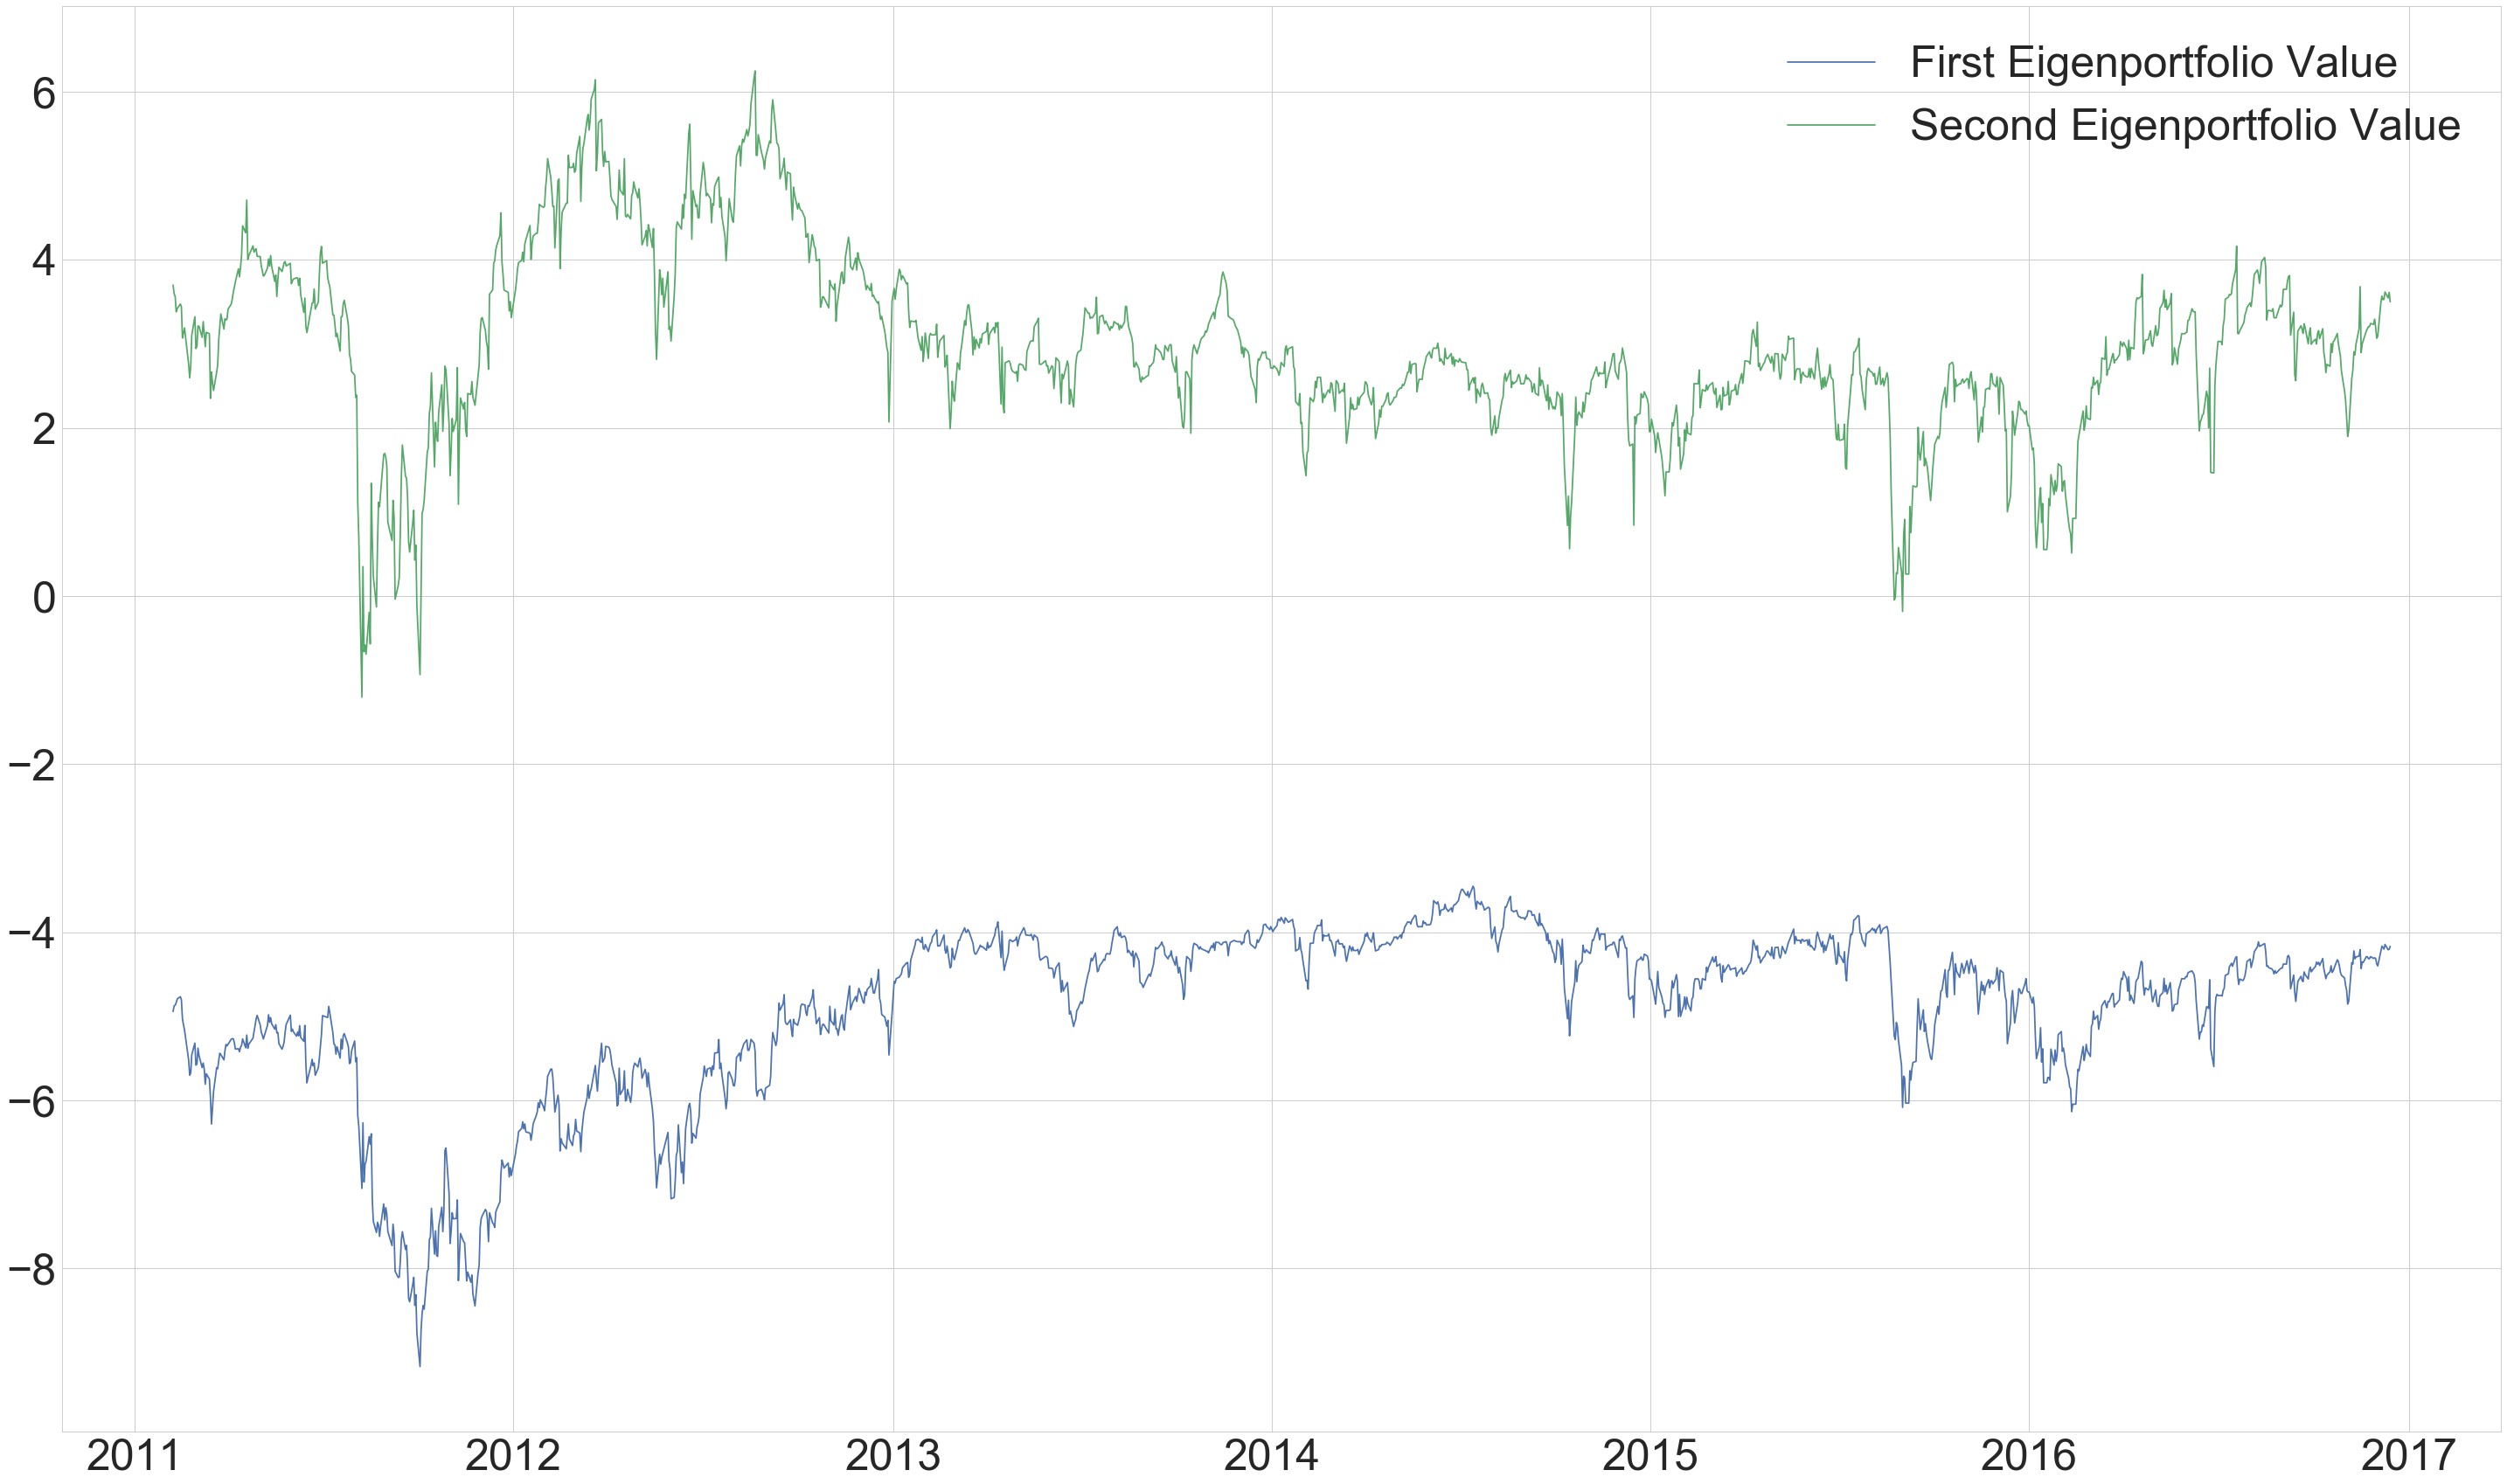

In [36]:
sns.set(font_scale=5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(50,30))
                       
ax.plot(df_value_first_eigenportfolio, label='First Eigenportfolio Value')
ax.plot(df_value_second_eigenportfolio, label='Second Eigenportfolio Value')
plt.legend(loc='best')                      
plt.show()

We can also track the daily returns of the two eigenportfolios:

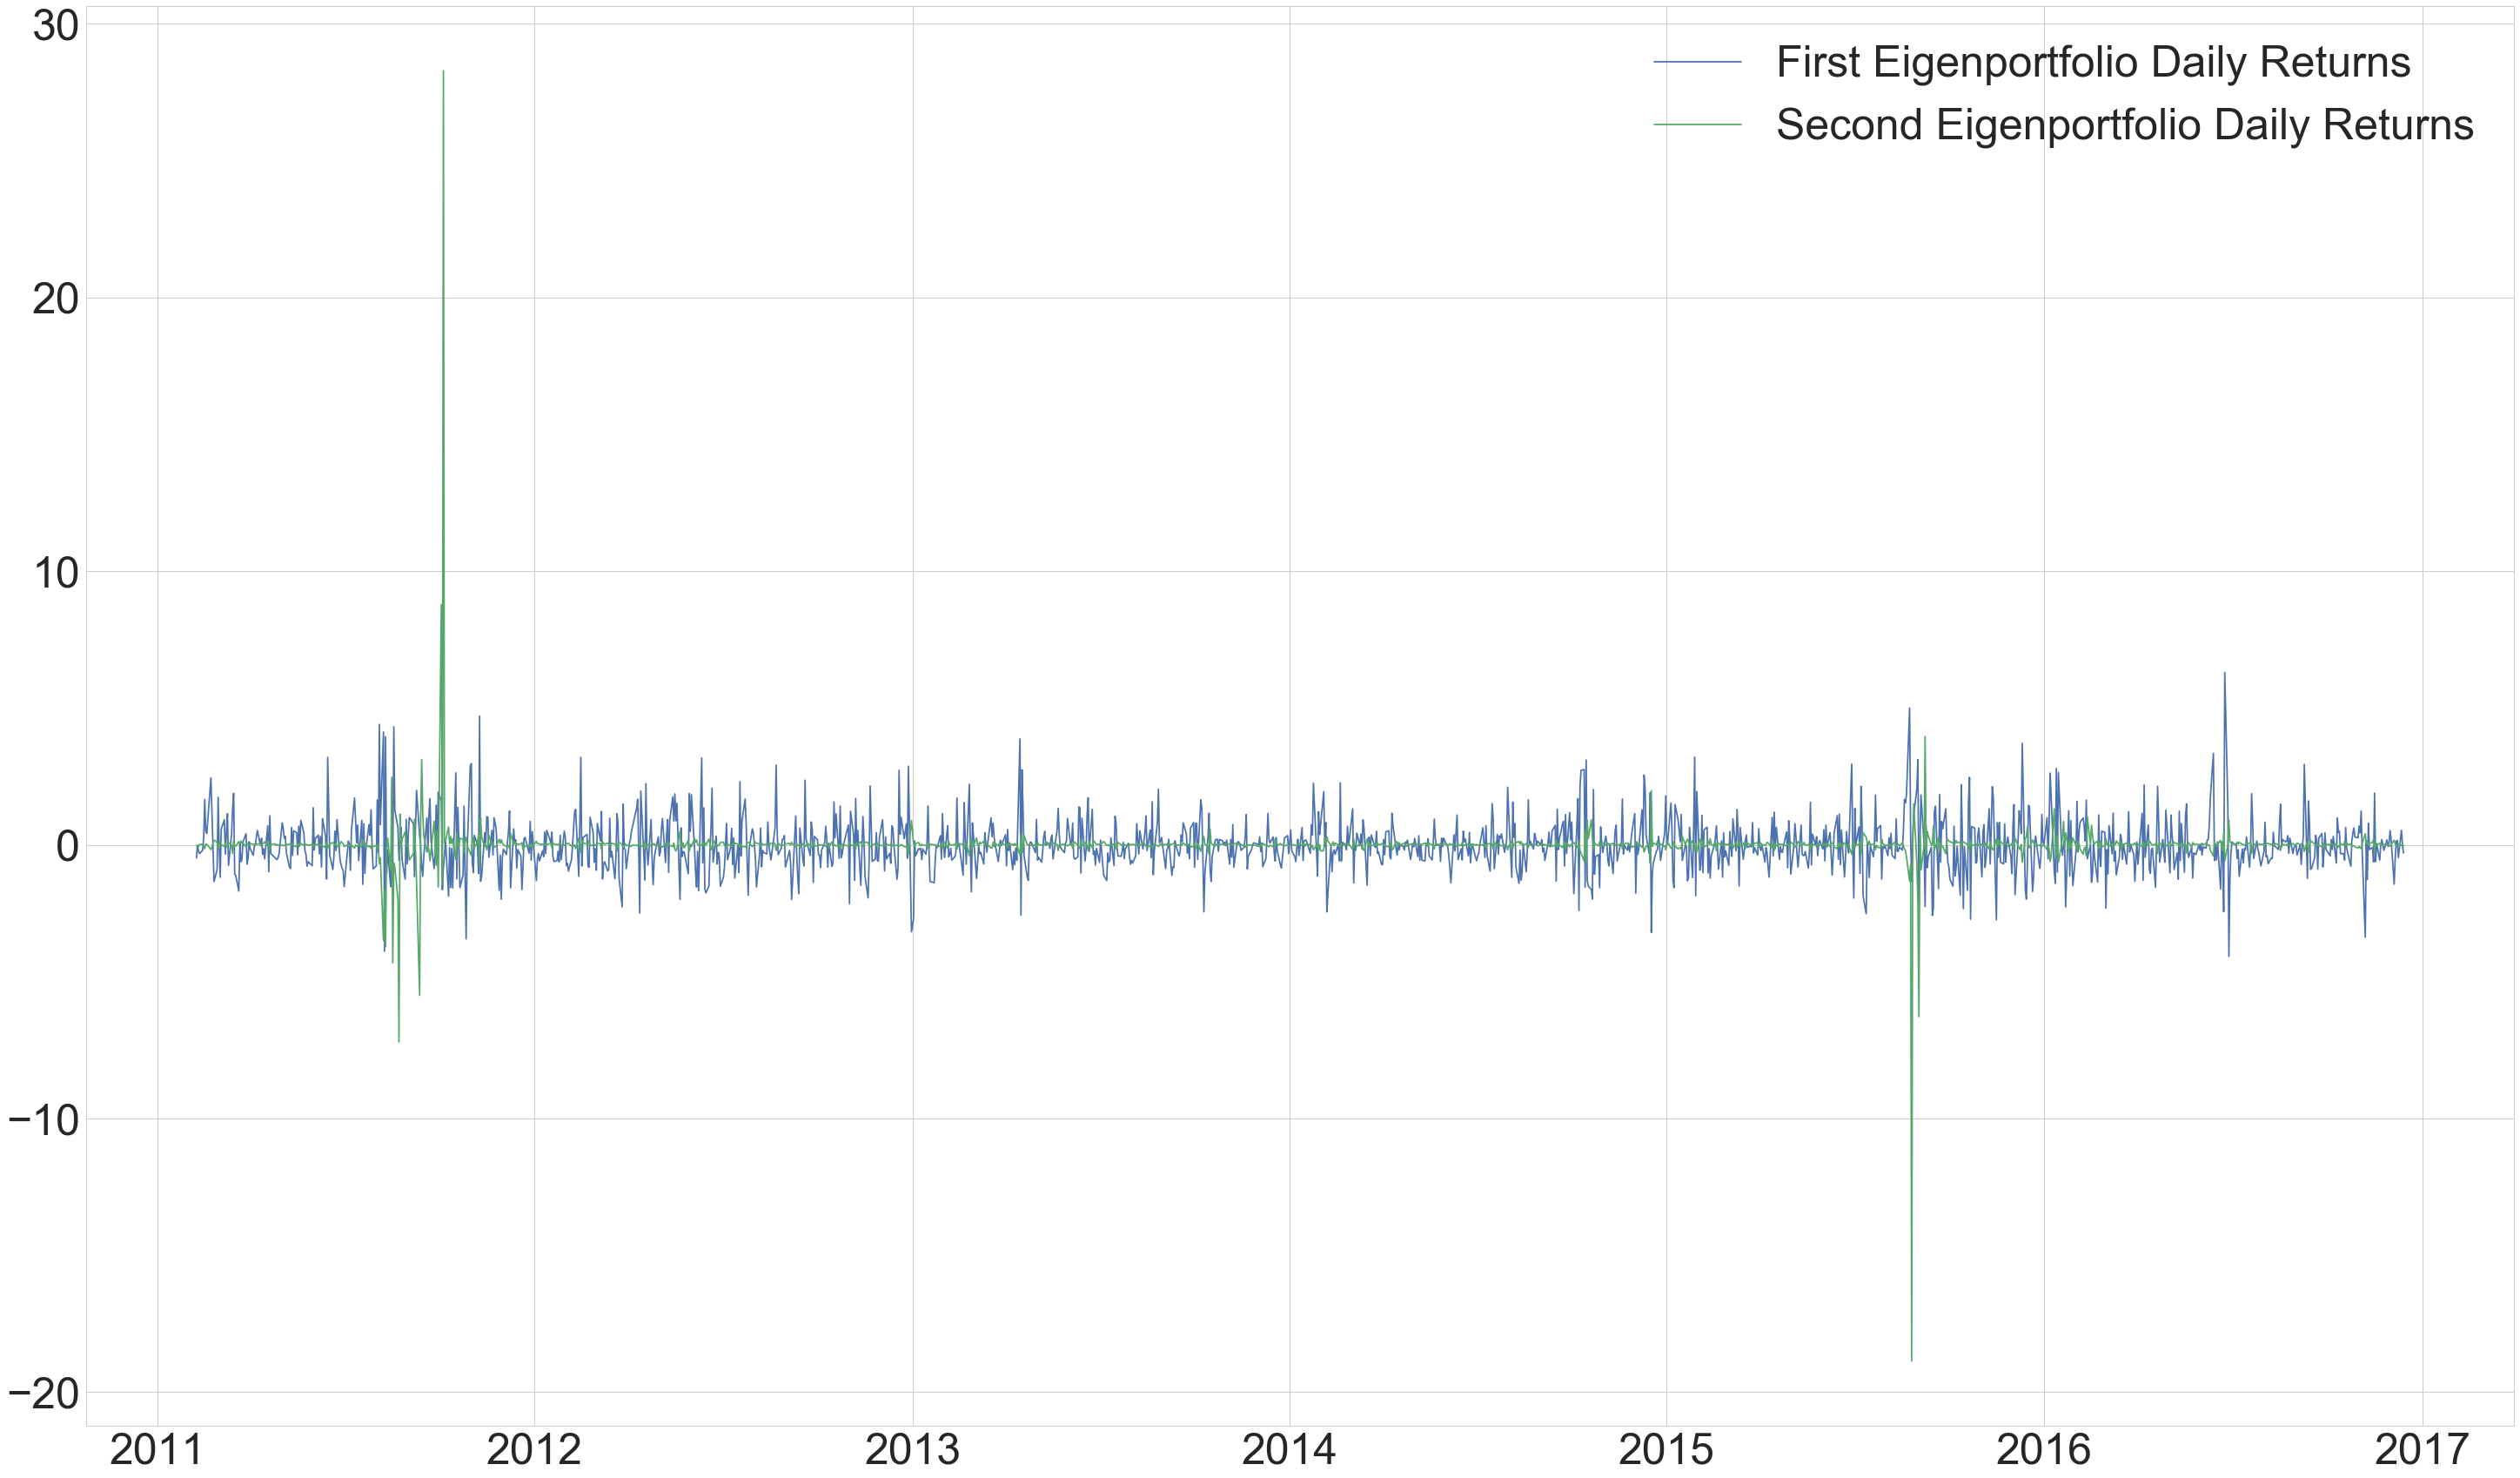

In [39]:
sns.set(font_scale=5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(50,30))

df_ret_first_eigenportfolio = df_value_first_eigenportfolio.pct_change()[1:]
df_ret_second_eigenportfolio = df_value_second_eigenportfolio.pct_change()[1:]
ax.plot(df_ret_first_eigenportfolio/df_ret_first_eigenportfolio.std(), label='First Eigenportfolio Daily Returns')
ax.plot(df_ret_second_eigenportfolio/df_ret_second_eigenportfolio.std(), label='Second Eigenportfolio Daily Returns')
plt.legend(loc='best')                      
plt.show()

## Question C

First, let's get the combined histogram of VIX futures and VIX:

In [40]:
df_vix_vx = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'vix']]

# Remove NaN, Inf values
df_vix_vx = df_vix_vx.replace([np.inf, -np.inf], np.nan)
df_vix_vx = df_vix_vx.dropna(axis=0,how='any')

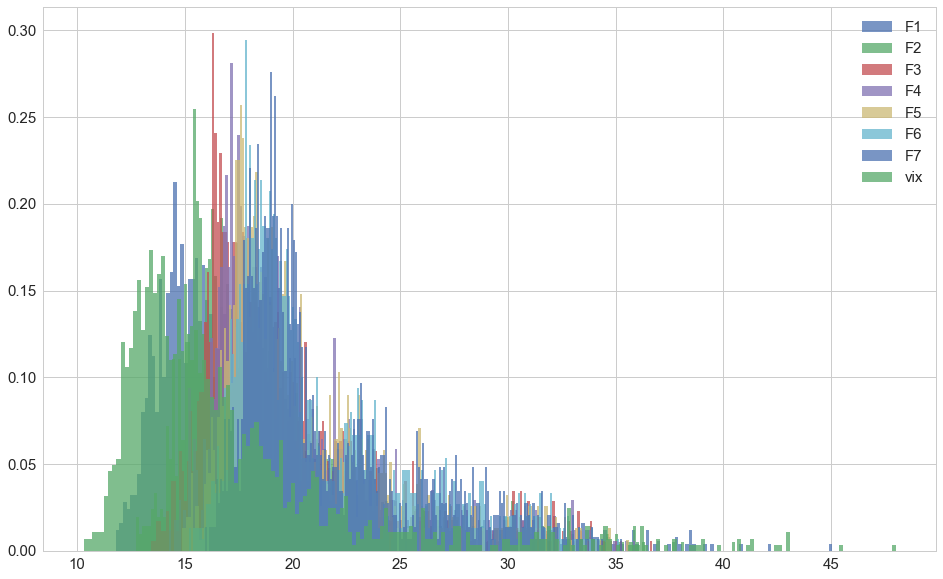

In [54]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16,10))

labels = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'vix']

for label in labels:
    plt.hist(df_vix_vx[label], bins=200, alpha=0.75, label=label, normed=True)

plt.legend(loc='best')
plt.show()

The combines histogram seems to be indicating that all the entities are unimodal. We can look at the individual histograms too:

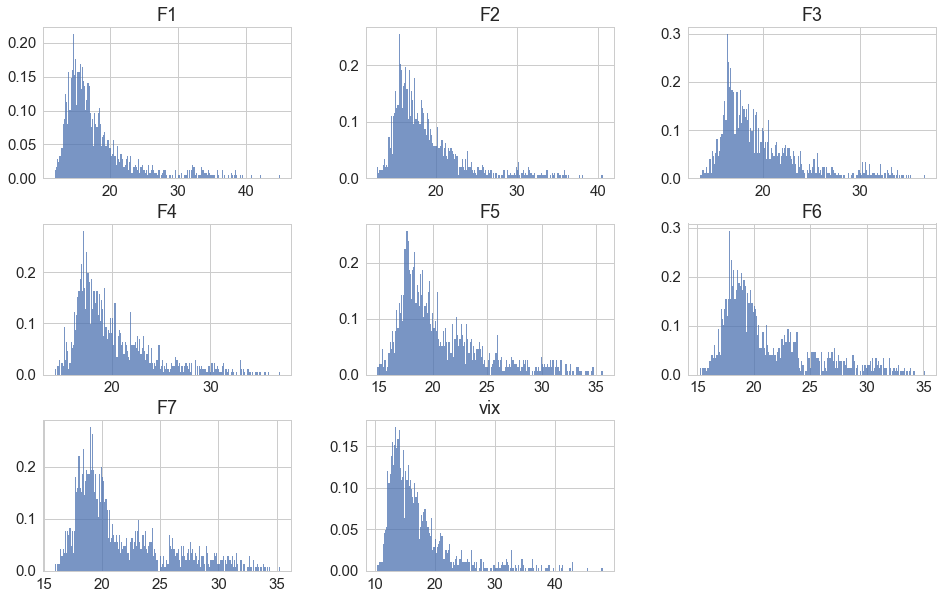

In [67]:
df_vix_vx.hist(bins=200, alpha=0.75, normed=True, figsize=(16, 10))
plt.show()

Let's verify this by calculating the mode for each column:

In [76]:
df_vix_vx.mode()

,F1,F2,F3,F4,F5,F6,F7,vix
0,14.2,15.55,16.45,17.1,17.7,17.85,18.45,13.79
1,15.5,NaN,NaN,NaN,NaN,NaN,19.00,NaN


The table above shows that F2, F3, F4, F5, F6, and VIX are indeed unimodal. However, F1 and F7 seem to have 2 modes. This might be due to precision errors, as in both cases the 2 modes are very close to each other.

Now, let's use linear interpolation to find the values for fixed tenors - 20, 40, 60, 80, 100, and 120 days. We have the stored the days to expiry for each future in the corresponding '\_exp' column.
We will store the value in columns of the format 'F_{t}', where t is the days to expiry.

In [56]:
tenor_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
tenors_expiries_columns = [ tenor + "_exp"  for tenor in tenor_columns]
fixed_tenors = [20, 40, 60, 80, 100, 120]

for t in fixed_tenors:
    df["F_{}".format(t)] = df.apply(lambda row: np.interp(t, row[tenors_expiries_columns], row[tenor_columns]), axis=1)

df_vix_vx_fixed = df[['F_20', 'F_40', 'F_60', 'F_80', 'F_100', 'F_120','vix']]
# To see what's the interpolated data looks like:
df_vix_vx_fixed.head()

,F_20,F_40,F_60,F_80,F_100,F_120,vix
Date,,,,,,,
2011-02-07,17.9250,19.048,19.9200,20.7000,21.406,22.0325,16.280001
2011-02-08,17.7950,18.844,19.6650,20.4100,21.138,21.7500,15.810000
2011-02-09,17.9000,18.880,19.6750,20.4250,21.120,21.7250,15.870000
2011-02-10,18.0200,18.940,19.6575,20.3075,20.908,21.4350,16.090000
2011-02-11,17.8325,18.798,19.5700,20.2100,20.786,21.2900,15.690000


Now, we can repeat the histogram for the fixed tenors dataframe:

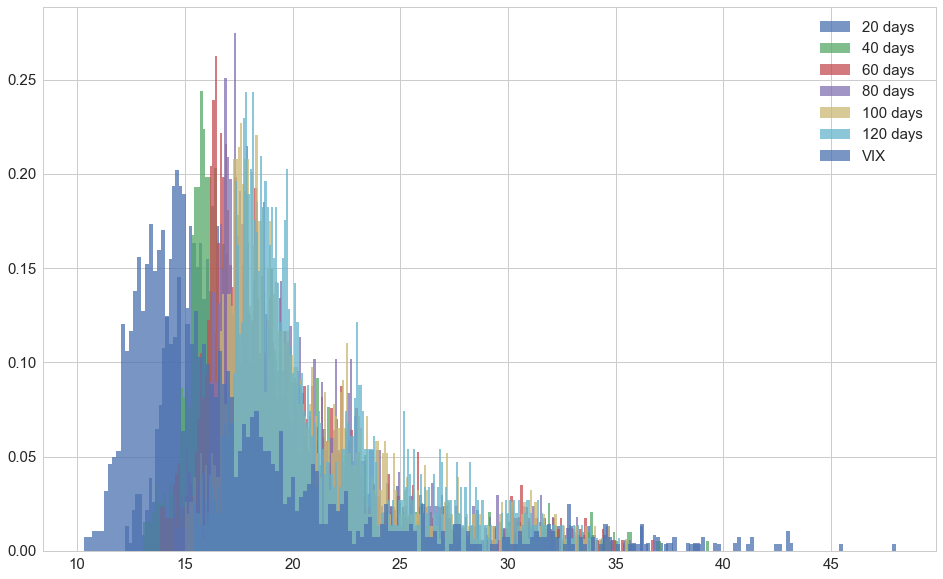

In [58]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16,10))

column_label_pairs = [('F_20', '20 days'), ('F_40', '40 days'), ('F_60', '60 days'), ('F_80', '80 days'),
                      ('F_100', '100 days'), ('F_120', '120 days'), ('vix', 'VIX')]

for (column, label) in column_label_pairs:
    plt.hist(df_vix_vx_fixed[column], bins=200, alpha=0.75, label=label, normed=True)

plt.legend(loc='best')
plt.show()

The combines histogram again seems to be indicating that all the entities are unimodal. We can look at the individual histograms too:

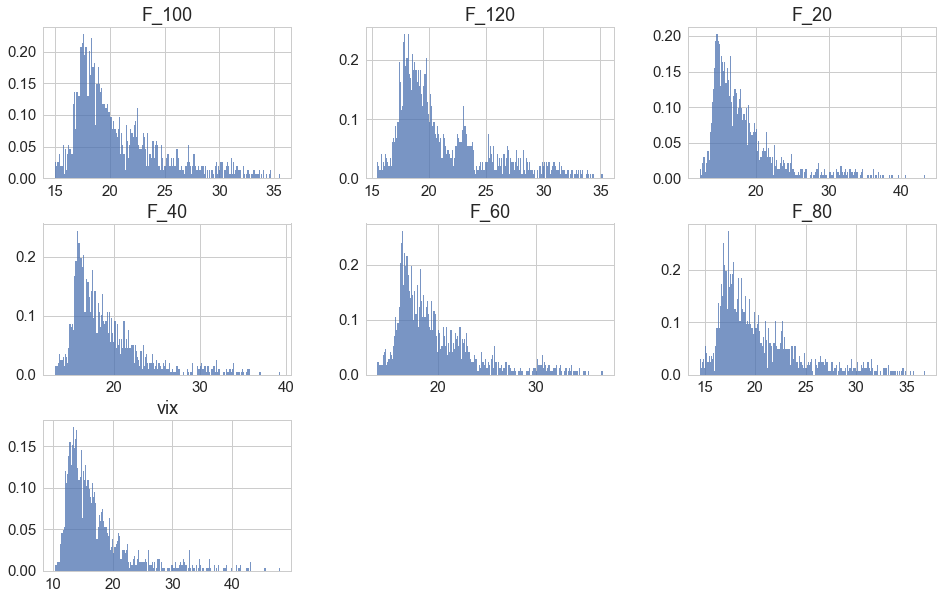

In [66]:
df_vix_vx_fixed.hist(bins=200, alpha=0.75, normed=True, figsize=(16, 10))
plt.show()

Let's verify this by calculating the mode for each column:

In [61]:
df_vix_vx_fixed.mode()

,F_20,F_40,F_60,F_80,F_100,F_120,vix
0,15.6,15.800,16.61,17.0,17.70,19.725,13.79
1,NaN,15.875,NaN,NaN,17.82,NaN,NaN
2,NaN,16.000,NaN,NaN,NaN,NaN,NaN
3,NaN,16.050,NaN,NaN,NaN,NaN,NaN


The table above shows that 20 days, 60 days, 80 days, 120 days, and VIX are indeed unimodal. However, 40 days tenor seems to have 4 modes and 100 days tenor seem to have 2 modes. This again might be due to precision errors, as in both cases the modes are very close to each other.

In [99]:
tenor_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']

vix = []
tao = []
v_tao = []

for index, row in df.iterrows():
    for tenor in tenor_columns:
        vix.append(row['vix'])
        tao.append(row[tenor + '_exp'])
        v_tao.append(row[tenor])


In [87]:
vix = np.array(vix)
tao = np.array(tao)
v_tao = np.array(v_tao)

In [100]:
def func(params,vix, tao, v_tao):
    v_inf, kappa, sigma = params;
    f = np.exp(-kappa*tao)*np.log(vix) + (1-np.exp(-kappa*tao))*np.log(v_inf)\
        + (sigma**2/(4*kappa))*(np.exp(-kappa*tao) - np.exp(-2*kappa*tao))
    return v_tao - np.exp(f)

p0=np.array([23, 1.7, 1], dtype='float64')
p1, success = scipy.optimize.leastsq(func, p0[:], args=(np.array(vix, dtype='float64'),
                                                        np.array(tao, dtype='float64'),
                                                        np.array(v_tao, dtype='float64')))
v_inf, kappa, sigma = p1   
#p1

/Users/canelbiryol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/Users/canelbiryol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


In [102]:
p1, success

(array([  2.39116472e+01,   6.63153008e-03,  -6.61332424e-02]), 1)

In [ ]:
t = Shashank will feed days to maturity :)
curve = v_inf*np.exp(-sigma**2/(4*kappa)) * np.exp(-2*kappa*t/252)
Shashank will plot :P